# Will it rain?
Predict if it is going to rain, based on the meteorological measurements.

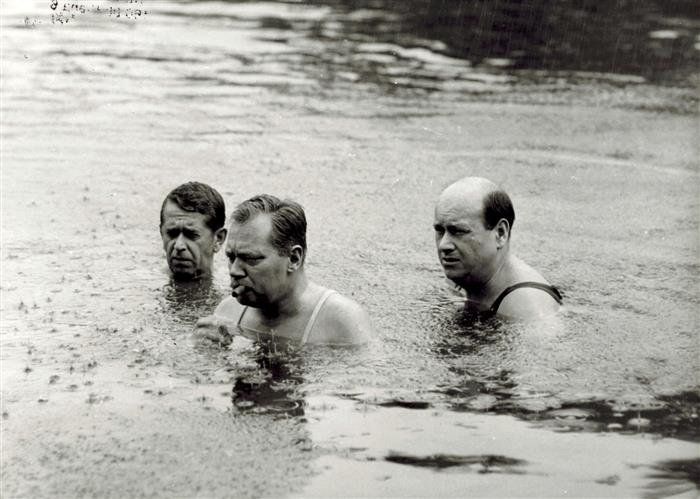

## Evaluation
Submissions are evaluated on area under the [ROC curve](https://www.youtube.com/watch?v=4jRBRDbJemM) between the predicted probability and the observed target.

## Dataset

**train.csv** - the training dataset; rainfall is the binary target\
**test.csv** - the test dataset; the objective is to predict the probability of rainfall for each row\
**sample_submission.csv** - a sample submission file in the correct format\
**rainfall.csv** - the original data used to train deep learning model used to generate datasets for the competition


## Initialize Notebook and Load Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Keep important settings/configuration in one place
class Config:
    
    # datasets
    train_path = '/kaggle/input/playground-series-s5e3/train.csv'
    test_path = '/kaggle/input/playground-series-s5e3/test.csv'
    sample_submission_path = '/kaggle/input/playground-series-s5e3/sample_submission.csv'
    original_data_path = '/kaggle/input/rainfall-prediction-using-machine-learning/Rainfall.csv'  

    target = 'rainfall'
    random_state = 2

In [2]:
# Load Data
train = pd.read_csv(Config.train_path, index_col = 'id')
test = pd.read_csv(Config.test_path, index_col = 'id')
submission = pd.read_csv(Config.sample_submission_path, index_col = 'id')
original_data = pd.read_csv(Config.original_data_path)

print('train:',train.shape)
print('test:',test.shape)
print('submission', submission.shape)
print('original_data:',original_data.shape)

# # combine train and original dataset
# train = pd.concat([train,original_data], ignore_index=True)
# print('combined train:',train.shape)

display(train.head())

train: (2190, 12)
test: (730, 11)
submission (730, 1)
original_data: (366, 12)


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
id,,,,,,,,,,,,
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


We have following columns:
- **day**: The specific day of observation.
- **pressure**: Atmospheric pressure measured in hPa.
- **maxtemp**: Maximum recorded temperature for the day (°C).
- **temparature**: Average temperature for the day (°C).
- **mintemp**: Minimum recorded temperature for the day (°C).
- **dewpoint**: Temperature at which air becomes saturated with moisture (°C).
- **humidity**: Relative humidity percentage.
- **cloud**: Cloud cover percentage.
- **sunshine**: Total hours of sunshine for the day.
- **winddirection**: Direction of the wind in degrees.
- **windspeed**: Wind speed measured in km/h.

Target:
- **rainfall**: Did it rain? Boolean.

## Data Completenes

In [3]:
# Count of NaN values per column
nans_train = train.isna().sum()
nans_test = test.isna().sum()

# Only show columns with at least one NaN
display(nans_train[nans_train > 0])
display(nans_test[nans_test > 0])

Series([], dtype: int64)

winddirection    1
dtype: int64

There is only one missing value in test dataset. Let's drop the line.

In [4]:
test.dropna(inplace = True)

## Distribution and Correlation

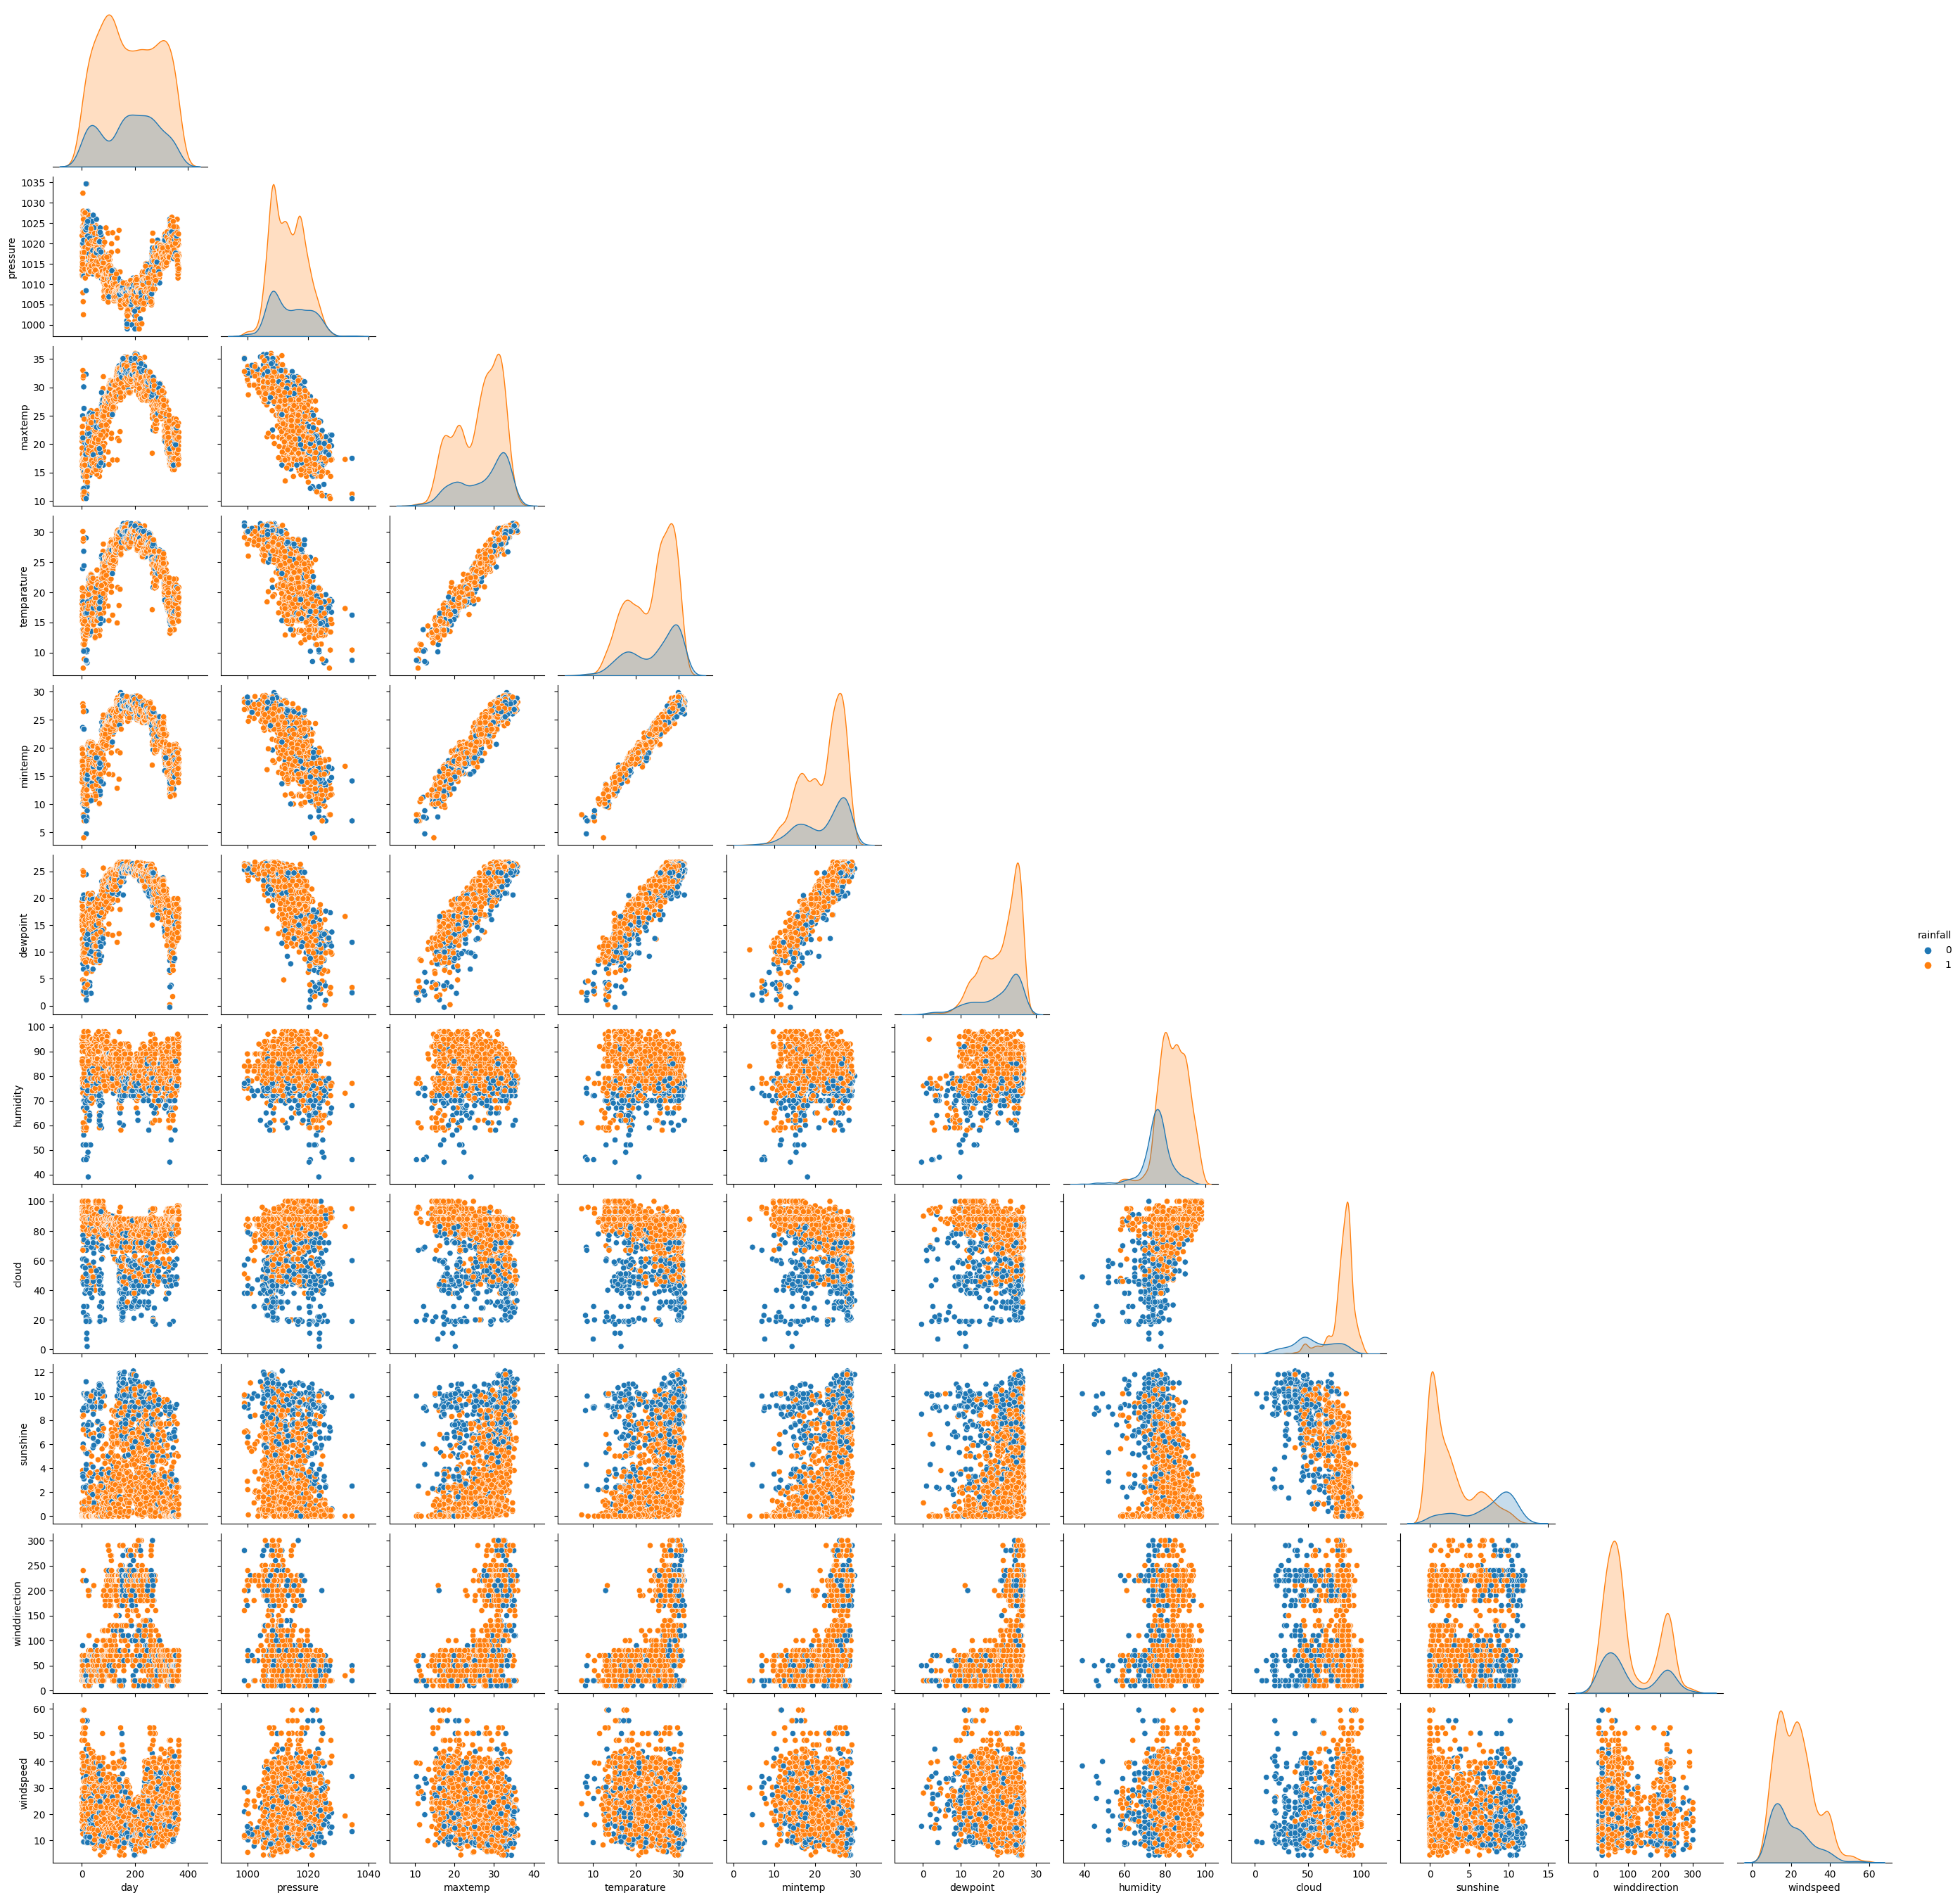

In [5]:
sns.pairplot(train, hue=Config.target, corner=True);

In [6]:
# compare distributions of train and test datasets
